In [5]:
pip install -U langchain langchain-openai

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from langchain_openai import ChatOpenAI
import os
import getpass
print("ESTABLECIENDO CLAVE DE LangSmith")
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_API_KEY"] = getpass.getpass("INGRESA LA API KEY DE LANGSMITH: ")
print("ESTABLECIENDO CLAVES PUBLICAS")

ESTABLECIENDO CLAVE DE LangSmith


INGRESA LA API KEY DE LANGSMITH:  ········


ESTABLECIENDO CLAVES PUBLICAS


In [13]:
pip install -qU "langchain[google-genai]"

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
print("SELECCIONANDO MODELO DE CHAT")
import getpass
import os
from langchain.chat_models import init_chat_model

if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("INGRESA LA API KEY DE GOOGLE GEMINI: ")

from langchain.chat_models import init_chat_model

llm = init_chat_model("gemini-2.0-flash", model_provider="google_genai")


SELECCIONANDO MODELO DE CHAT


INGRESA LA API KEY DE GOOGLE GEMINI:  ········


In [14]:
pip install langchain-ollama

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install -U -q langchain-huggingface


^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
print("SELECCIONANDO MODELO DE EMBEDDINGS")
from langchain_huggingface import HuggingFaceEmbeddings

# Embedding liviano y especializado
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

print("Embedding seleccionado")

SELECCIONANDO MODELO DE EMBEDDINGS
Embedding seleccionado


In [5]:
pip install -U -q chromadb langchain-chroma

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install -U -q langchain-core langgraph

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from langchain_chroma import Chroma

vector_store = Chroma(
    collection_name="example_collectionV2",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db",  # Where to save data locally, remove if not necessary
)
print("VECTOR STORE USANDO CHROMA")

VECTOR STORE USANDO CHROMA


In [10]:
# IMPORTANCIONES Y DEPENDENCIAS
import bs4
from langchain import hub
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict

# Carga y fragmentación del contenido web
print("🔄 Cargando contenido web...")
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)
docs = loader.load()
print(f"✅ CONTENIDO WEB CARGADO. Documentos obtenidos: {len(docs)}")

# División del texto en partes pequeñas
print("✂️ Dividiendo documentos...")
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500, chunk_overlap=100)
all_splits = text_splitter.split_documents(docs)
print(f"📄 Fragmentos generados: {len(all_splits)}")

# Agrega los fragmentos divididos al almacenamiento vectorial (vector_store)
print("🧠 Agregando fragmentos al vector store...")
for i, doc in enumerate(all_splits, 1):
    _ = vector_store.add_documents(documents=[doc])
    print(f"Fragmento {i}/{len(all_splits)} agregado")
print("✅ Fragmentos agregados al vector store.")

# Define prompt for question-answering
print("📥 Cargando prompt predefinido desde LangChain Hub...")
prompt = hub.pull("rlm/rag-prompt")
print("✅ Prompt cargado correctamente.")

# Definición del estado de la aplicación con tipos
class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

# Definición de la función para recuperar documentos
def retrieve(state: State):
    print(f"🔍 Buscando contexto para la pregunta: {state['question']}")
    retrieved_docs = vector_store.similarity_search(state["question"])
    print(f"✅ Documentos recuperados: {len(retrieved_docs)}")
    return {"context": retrieved_docs}

# Definición de la función para generar la respuesta
def generate(state: State):
    print("🧠 Generando respuesta...")
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    print("✅ Respuesta generada.")
    return {"answer": response.content}

# Construcción y compilación del grafo de estados
print("🔧 Construyendo grafo de estados...")
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()
print("✅ Proceso correctamente creado.")

🔄 Cargando contenido web...
✅ CONTENIDO WEB CARGADO. Documentos obtenidos: 1
✂️ Dividiendo documentos...
📄 Fragmentos generados: 40
🧠 Agregando fragmentos al vector store...
Fragmento 1/40 agregado
Fragmento 2/40 agregado
Fragmento 3/40 agregado
Fragmento 4/40 agregado
Fragmento 5/40 agregado
Fragmento 6/40 agregado
Fragmento 7/40 agregado
Fragmento 8/40 agregado
Fragmento 9/40 agregado
Fragmento 10/40 agregado
Fragmento 11/40 agregado
Fragmento 12/40 agregado
Fragmento 13/40 agregado
Fragmento 14/40 agregado
Fragmento 15/40 agregado
Fragmento 16/40 agregado
Fragmento 17/40 agregado
Fragmento 18/40 agregado
Fragmento 19/40 agregado
Fragmento 20/40 agregado
Fragmento 21/40 agregado
Fragmento 22/40 agregado
Fragmento 23/40 agregado
Fragmento 24/40 agregado
Fragmento 25/40 agregado
Fragmento 26/40 agregado
Fragmento 27/40 agregado
Fragmento 28/40 agregado
Fragmento 29/40 agregado
Fragmento 30/40 agregado
Fragmento 31/40 agregado
Fragmento 32/40 agregado
Fragmento 33/40 agregado
Fragmento 

In [11]:
response = graph.invoke({"question": "¿Qué es la descomposición de tareas?"})
print(response["answer"])

🔍 Buscando contexto para la pregunta: ¿Qué es la descomposición de tareas?
✅ Documentos recuperados: 4
🧠 Generando respuesta...
✅ Respuesta generada.
La descomposición de tareas es una técnica para mejorar el rendimiento del modelo en tareas complejas. Implica dividir tareas grandes en pasos más pequeños y simples. Esto se puede hacer mediante indicaciones simples, instrucciones específicas de la tarea o aportaciones humanas.


In [7]:
response = graph.invoke({"question": "What is Task Decomposition?"})
print(response["answer"])

🔍 Buscando contexto para la pregunta: What is Task Decomposition?
✅ Documentos recuperados: 4
🧠 Generando respuesta...
✅ Respuesta generada.
I'm sorry, but the provided context does not contain information about task decomposition. Therefore, I cannot answer your question.


In [8]:
response = graph.invoke({"question": "¿De que trata el articulo?"})
print(response["answer"])

🔍 Buscando contexto para la pregunta: ¿De que trata el articulo?
✅ Documentos recuperados: 4
🧠 Generando respuesta...
✅ Respuesta generada.
El artículo trata sobre la arquitectura de agentes generativos y cómo esta simulación resulta en un comportamiento social emergente. Este comportamiento incluye la difusión de información, la memoria de relaciones y la coordinación de eventos sociales. También menciona AutoGPT y sus problemas de confiabilidad.


In [12]:
import bs4
from langchain_community.document_loaders import WebBaseLoader

# Only keep post title, headers, and content from the full HTML.
bs4_strainer = bs4.SoupStrainer(class_=("post-title", "post-header", "post-content"))
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs={"parse_only": bs4_strainer},
)
docs = loader.load()

assert len(docs) == 1
print(f"Total characters: {len(docs[0].page_content)}")

Total characters: 43047


In [10]:
print(docs[0].page_content[:500])



      LLM Powered Autonomous Agents
    
Date: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng


Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.
Agent System Overview#
In


In [11]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # chunk size (characters)
    chunk_overlap=200,  # chunk overlap (characters)
    add_start_index=True,  # track index in original document
)
all_splits = text_splitter.split_documents(docs)

print(f"Split blog post into {len(all_splits)} sub-documents.")

Split blog post into 63 sub-documents.


In [13]:
document_ids = vector_store.add_documents(documents=all_splits)

print(document_ids[:3])

['ff56c577-4783-49d3-acd5-08034a7cce93', 'b72a52ff-69fa-4596-874e-3b39f280427d', '23f72733-70dc-4146-81e1-c8e8c077addf']


In [1]:
from langchain import hub

# N.B. for non-US LangSmith endpoints, you may need to specify
# api_url="https://api.smith.langchain.com" in hub.pull.
prompt = hub.pull("rlm/rag-prompt")

example_messages = prompt.invoke(
    {"context": "(context goes here)", "question": "(question goes here)"}
).to_messages()

assert len(example_messages) == 1
print(example_messages[0].content)

C:\Users\Usuario\Documents\GitHub\ProyectoTallerIntegrador\EntidexEnterprise\venv\Lib\site-packages\langsmith\client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: (question goes here) 
Context: (context goes here) 
Answer:


In [14]:
from langchain_core.documents import Document
from typing_extensions import List, TypedDict
from langgraph.graph import START, StateGraph

class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}

def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}

graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()    


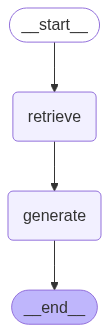

In [15]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
result = graph.invoke({"question": "What is Task Decomposition?"})

print(f'Context: {result["context"]}\n\n')
print(f'Answer: {result["answer"]}')

Context: [Document(id='9a9c7215-328a-4a9e-bf31-c3e8b4f18918', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Component One: Planning#\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.\nTree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS

In [17]:
for step in graph.stream(
    {"question": "What is Task Decomposition?"}, stream_mode="updates"
):
    print(f"{step}\n\n----------------\n")

{'retrieve': {'context': [Document(id='9a9c7215-328a-4a9e-bf31-c3e8b4f18918', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Component One: Planning#\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.\nTree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-firs

In [18]:
for message, metadata in graph.stream(
    {"question": "What is Task Decomposition?"}, stream_mode="messages"
):
    print(message.content, end="|")

Task| decomposition is a| method of breaking down complex tasks into smaller, simpler steps. It can be achieved through| prompting language models, using task-specific instructions, or with human input. This approach| is utilized to enhance model performance on intricate tasks by transforming them into manageable sub-tasks.
|

In [19]:
from langchain_core.prompts import PromptTemplate

template = """Use the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.
Use three sentences maximum and keep the answer as concise as possible.
Always say "thanks for asking!" at the end of the answer.

{context}

Question: {question}

Helpful Answer:"""
custom_rag_prompt = PromptTemplate.from_template(template)

In [20]:
total_documents = len(all_splits)
third = total_documents // 3

for i, document in enumerate(all_splits):
    if i < third:
        document.metadata["section"] = "beginning"
    elif i < 2 * third:
        document.metadata["section"] = "middle"
    else:
        document.metadata["section"] = "end"


all_splits[0].metadata

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
 'section': 'beginning'}

In [21]:
from langchain_core.vectorstores import InMemoryVectorStore

vector_store = InMemoryVectorStore(embeddings)
_ = vector_store.add_documents(all_splits)

In [22]:
from typing import Literal

from typing_extensions import Annotated


class Search(TypedDict):
    """Search query."""

    query: Annotated[str, ..., "Search query to run."]
    section: Annotated[
        Literal["beginning", "middle", "end"],
        ...,
        "Section to query.",
    ]

In [23]:
class State(TypedDict):
    question: str
    query: Search
    context: List[Document]
    answer: str


def analyze_query(state: State):
    structured_llm = llm.with_structured_output(Search)
    query = structured_llm.invoke(state["question"])
    return {"query": query}


def retrieve(state: State):
    query = state["query"]
    retrieved_docs = vector_store.similarity_search(
        query["query"],
        filter=lambda doc: doc.metadata.get("section") == query["section"],
    )
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}


graph_builder = StateGraph(State).add_sequence([analyze_query, retrieve, generate])
graph_builder.add_edge(START, "analyze_query")
graph = graph_builder.compile()

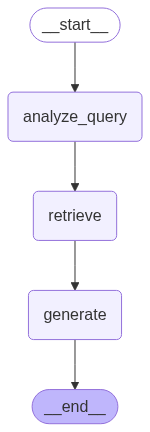

In [24]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
for step in graph.stream(
    {"question": "What does the end of the post say about Task Decomposition?"},
    stream_mode="updates",
):
    print(f"{step}\n\n----------------\n")

{'analyze_query': {'query': {'query': 'Task Decomposition', 'section': 'end'}}}

----------------

{'retrieve': {'context': [Document(id='1132c058-4f54-47c9-aca6-c5c2ca372d84', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'section': 'end'}, page_content='Finite context length: The restricted context capacity limits the inclusion of historical information, detailed instructions, API call context, and responses. The design of the system has to work with this limited communication bandwidth, while mechanisms like self-reflection to learn from past mistakes would benefit a lot from long or infinite context windows. Although vector stores and retrieval can provide access to a larger knowledge pool, their representation power is not as powerful as full attention.\n\n\nChallenges in long-term planning and task decomposition: Planning over a lengthy history and effectively exploring the solution space remain challenging. LLMs struggle to adjust plans when faced w